**Filter Method Types**
1. Basic Filter Methods
    - VarianceThreshod (Remove the Constant Feature and Quasi-Constant Features)
    - Remove Duplicate Features
2. Correlation & Ranking Filter Methods
    - Pearson’s correlation coefficient
    - Spearman’s rank coefficient
    - Kendall’s rank coefficient
3. Statistical Methods
    - Anova or F-Test
    - Mutual Information
    - Chi Square    

**Disadvange of Variance Threshold**
- Does not consider the dependent(Target) variable.
- Does not consider correlations

### Correlation & Ranking Filter Methods for Feature Selection or Check the Multicollinearity in Features
- Pearson’s correlation coefficient(linear data)
- Spearman’s rank coefficient(linear and nonlinear)

**Covariance**

- Covariance measures the directional relationship between the two or more variables
- The sign of the covariance can be interpreted as whether the two variables change in the same direction (positive) or change in different directions (negative). 
- The magnitude of the covariance is not easily interpreted. A covariance value of zero indicates that both variables are completely independent.
- Example : When two stocks tend to move together, they are seen as having a positive covariance; when they move inversely, the covariance is negative.

**Correlation**

1. Correlation states how the features are related to each other or to the target variable.
2. Correlation is defined as a measure of the linear relationship between two quantitative variables, like height and weight. You could also define correlation is a measure of how strongly one variable depends on another.
3. Correlation can be positive (the values of one variable increase as the values of another increase) or negative (the values of one variable decrease as the values of another increase.)
4. A high correlation is often a useful property : if two variables are highly correlated, we can predict one from the other. Therefore, we generally look for features that are the highly correlated with the target, especially for linear machine learning models.
5. However, if two variables are highly correlated among themselves, they provide redundant information in regards to the target. Essentially, we can make an accurate prediction on the target with just one of the redundant variables.In these cases, the second variable doesn’t add additional information, so removing it can help to reduce the dimensionality and also the added noise.

Following Python methods we can use to get the corelation.
- Pearson’s correlation coefficient(linear) -- **DataFrame.corr(self, method=’pearson’, min_periods=1)**
- Spearman’s rank coefficient(nonlinear) -- **DataFrame.corr(self, method=’spearman’, min_periods=1)** 
- Kendall’s rank coefficient (nonlinear) -- **DataFrame.corr(self, method=’kendall’, min_periods=1)**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
x= np.array([0,1,2,3,4])
y = np.array([5,4,3,1,0])

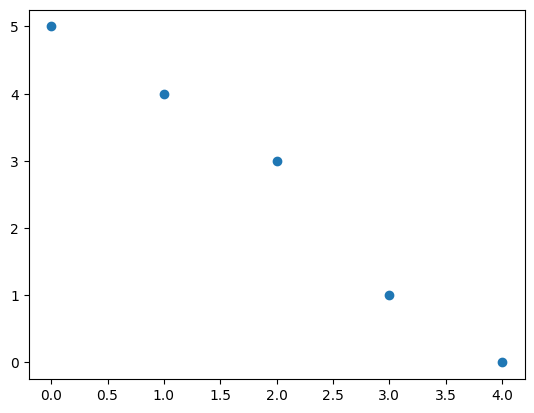

In [3]:
plt.scatter(x,y)

In [4]:
# The cov() NumPy function can be used to calculate a covariance matrix between two or more variables.
np.cov(x,y)

array([[ 2.5 , -3.25],
       [-3.25,  4.3 ]])

In [5]:
np.cov(x,y)[0,1]

-3.25

A covariance matrix is a square matrix giving the covariance between each pair of elements of a given random vector. its main diagonal contains variances (i.e., the covariance of each element with itself). 

In [6]:
np.cov([x,y],rowvar=1) # rowvar true (default), each row is a variable #Code returns, considering 2 variables:

array([[ 2.5 , -3.25],
       [-3.25,  4.3 ]])

In [7]:
np.cov([x,y],rowvar=0) # rowvar false, each column is a variable # Code returns, considering 5 variables:


array([[ 12.5,   7.5,   2.5,  -5. , -10. ],
       [  7.5,   4.5,   1.5,  -3. ,  -6. ],
       [  2.5,   1.5,   0.5,  -1. ,  -2. ],
       [ -5. ,  -3. ,  -1. ,   2. ,   4. ],
       [-10. ,  -6. ,  -2. ,   4. ,   8. ]])

In [8]:
x= np.array([0,1,2,3,4,5,6])
y = np.array([5,6,7,8,9,11,12])

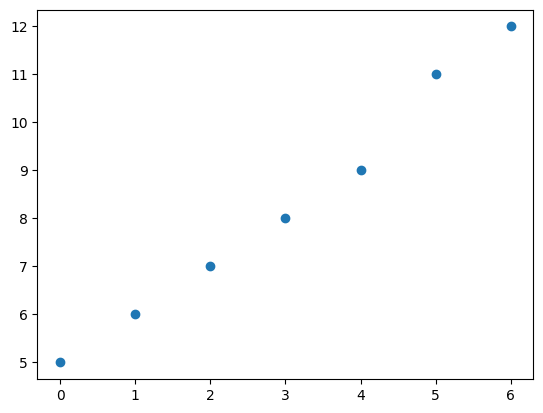

In [9]:
plt.scatter(x,y)

In [10]:
np.cov(x,y)

array([[4.66666667, 5.5       ],
       [5.5       , 6.57142857]])

In [11]:
# seed random number generator
#np.random.seed(2)
# prepare data
x = (10 * np.random.randn(500) - 10)
y = (x + (50 * np.random.randn(500) + 100))
print(x.shape)
print(y.shape)

(500,)
(500,)


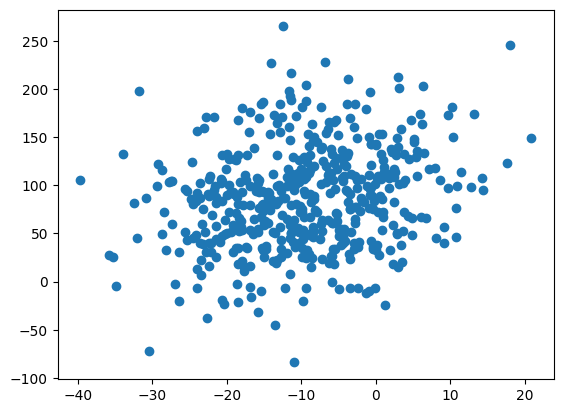

In [12]:
plt.scatter(x,y)

In [13]:
# calculate covariance matrix
covariance = np.cov(x, y,rowvar=False)
print(covariance)
covariance.shape

[[ 100.30221235  117.78355905]
 [ 117.78355905 2796.110372  ]]


(2, 2)

A problem with covariance is that it only show the corelation but dont show the strength of correlation between the variables.
So to solve this we use the Pearson’s correlation coefficient.

### Pearson’s correlation coefficient(Linear Dataset)

- It’s used to summarize the strength of the linear relationship between two data variables, which can vary between 1 and -1.
- 1 means a positive correlation: the values of one variable increase as the values of another increase.
- -1 means a negative correlation: the values of one variable decrease as the values of another increase.
- 0 means no linear correlation between the two variables.


The assumptions that the Pearson correlation coefficient makes:
- Both variables should be normally distributed.
- A linear relationship between the two variables.
- Data is equally distributed around the regression line

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [15]:
col1 = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]
col3 = [8,10,12,14,15,18,20,22,24,26,27,29,30,31,35,36,38,39,40,41,43,45,47,49]
col2 = [30,28,27,26,25,24,23,20,18,17,16,15,14,11,10,9,8,7,6,5,4,3,2,1]
col4 = [56,55,54,53,52,50,49,48,47,42,40,38,37,35,34,32,30,29,28,27,26,25,23,22]
col5 = [60,55,51,48,44,40,38,34,32,25,22,15,12,18,22,26,30,34,39,42,44,46,48,50]
col6 = [10,12,14,16,18,20,22,25,27,28,30,32,34,36,38,39,43,44,48,50,54,60,64,69]

In [16]:
df = pd.DataFrame({"A":col1,"B":col2,"C":col3,"D":col4,
                   "E":col5,
                   "Target":col6})

In [17]:
df.head(8)

,A,B,C,D,E,Target
0,2,30,8,56,60,10
1,3,28,10,55,55,12
2,4,27,12,54,51,14
3,5,26,14,53,48,16
4,6,25,15,52,44,18
5,7,24,18,50,40,20
6,8,23,20,49,38,22
7,9,20,22,48,34,25


In [18]:
X = df.iloc[:,0:-1]
y = df["Target"]

<Axes: >

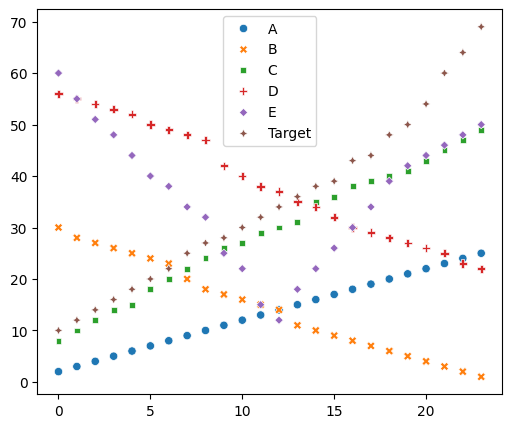

In [19]:
plt.figure(figsize=(6,5))
sns.scatterplot(data=df)

<Axes: >

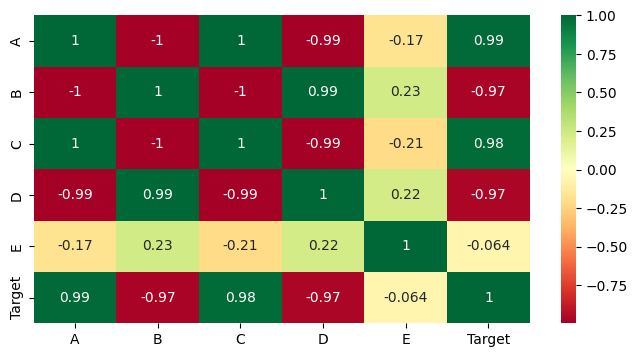

In [20]:
# Lets use plot the heatmap between feature and Target
import matplotlib.pyplot as plt
corr = df.corr(method='pearson')
import seaborn as sns
plt.figure(figsize=(8,4))
sns.heatmap(corr,cmap = "RdYlGn",annot=True)

<Axes: >

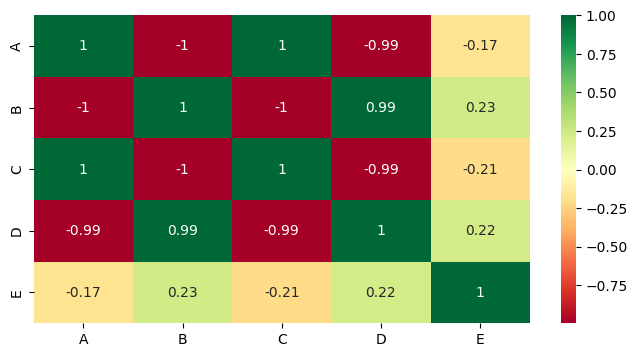

In [21]:
# Lets use plot the heatmap between features (independent variables)
import matplotlib.pyplot as plt
corr = df.iloc[:,0:-1].corr(method='pearson')
import seaborn as sns
plt.figure(figsize=(8,4))
sns.heatmap(corr,cmap = "RdYlGn",annot=True)

In [22]:
# With Dataframe correlation function
# Correlation between A and other features
df.corr(method='pearson')[0:1]

,A,B,C,D,E,Target
A,1.0,-0.995891,0.997833,-0.993818,-0.172473,0.987349


In [23]:
# With Dataframe correlation function
# Correlation between b and other features
df.corr(method='pearson')[1:2]

,A,B,C,D,E,Target
B,-0.995891,1.0,-0.996627,0.994711,0.229467,-0.973547


In [24]:
# Lets Calculate the Pearson using the pearsonr() SciPy function
from scipy import stats
corrA_B,_ =stats.pearsonr(df.A,df.B)
corrA_C,_ =stats.pearsonr(df.A,df.C)
corrA_D,_ =stats.pearsonr(df.A,df.D)
corrA_E,_ =stats.pearsonr(df.A,df.E)
corrA_T,_ =stats.pearsonr(df.A,df.Target)

In [25]:
print(corrA_B)
print(corrA_C)
print(corrA_D)
print(corrA_E)
print(corrA_T)

-0.9958911043660755
0.9978329758272735
-0.9938177829962499
-0.1724734072367485
0.9873494016270216


### Spearman’s rank coefficient(linear and nonlinear)

- We use this when two variables have a nonlinear relationship, which can be stronger or weaker across the distribution of the variables.
- It’s a non-parametric test that’s used to measure the degree of association between two variables with a monotonic function, meaning an increasing or decreasing relationship. 
- In a monotonic relationship, the variables tend to move in the same relative direction, but not necessarily at a constant rate. In a linear relationship, the variables move in the same direction at a constant rate.
- The measured strength between the variables using Spearman’s correlation varies between+1 and −1, which occurs when each of the variables is a perfect monotone function of the other.
-  It's a lot like Pearson’s correlation, but whereas Pearson’s correlation assesses linear relationships, Spearman’s correlation assesses monotonic relationships (whether linear or not)
- This test of relationship can also be used if there is a linear relationship between the variables, but will have slightly less power (e.g. may result in lower coefficient scores).
- This is a common approach used in non-parametric statistics, e.g. statistical methods where we do not assume a distribution of the data such as Gaussian.
- If we are unsure of the distribution and possible relationships between two variables, Spearman correlation coefficient is a good tool to use.
- The intuition for the Spearman’s rank correlation is that it calculates a Pearson’s correlation (e.g. a parametric measure of correlation) using the rank values instead of the real values. Where the Pearson’s correlation is the calculation of the covariance between the two variables normalized by the variance .
- Spearman’s coefficient is suitable for both continuous and discrete ordinal variables.

### Kendall’s rank correlation coefficient

- Kendall’s rank correlation coefficient is a non-parametric test that measures the strength of the ordinal association between two variables. 
- It calculates a normalized score for the number of matching or concordant rankings between the two data samples.
- Kendall’s correlation varies between 1 and -1. 
- It will take the value of 1 (high) when observations have a similar rank between the two variables, and value of -1 (low) when observations have a dissimilar rank between the two variables.
- This type of correlation is best suited for discrete data. 

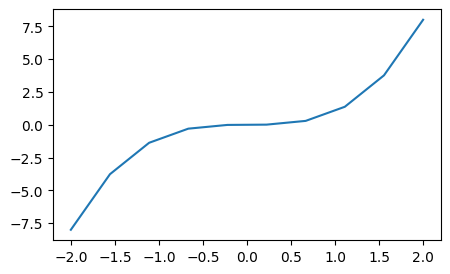

In [26]:
# Creating vectors X and Y 
x = np.linspace(-2, 2, 10)
y = x**3
  
fig = plt.figure(figsize = (5, 3)) 
# Create the plot 
plt.plot(x, y) 
  
# Show the plot 
plt.show() 

In [27]:
df2 = pd.DataFrame({"x":x,"y":y})
df2

,x,y
0,-2.000000,-8.000000
1,-1.555556,-3.764060
2,-1.111111,-1.371742
3,-0.666667,-0.296296
4,-0.222222,-0.010974
5,0.222222,0.010974
6,0.666667,0.296296
7,1.111111,1.371742
8,1.555556,3.764060
9,2.000000,8.000000


In [28]:
df2.corr(method='pearson')

,x,y
x,1.000000,0.922749
y,0.922749,1.000000


In [29]:
df2.corr(method='spearman')

,x,y
x,1.0,1.0
y,1.0,1.0


In [30]:
df2.corr(method='kendall')

,x,y
x,1.0,1.0
y,1.0,1.0


In [31]:
# Create Non-Linear dataset but non-monotonic
de_linearize = lambda X: np.cos(1.2 * np.pi * X)# + np.cos( 5 * np.pi * X )
X = np.sort(np.random.rand(1000)) * 1.8
y = de_linearize(X) + np.random.randn(1000) * 0.4

In [32]:
X.shape,y.shape

((1000,), (1000,))

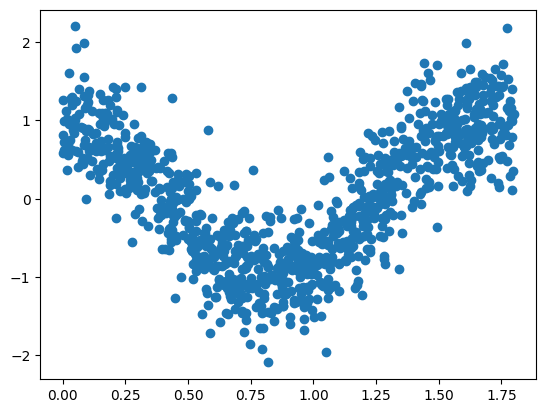

In [33]:
plt.scatter(X,y)

In [34]:
df_nl = pd.DataFrame({"X":X,"Target":y})

In [35]:
df_nl.head()

,X,Target
0,0.000254,1.262405
1,0.002157,0.820052
2,0.002532,0.583252
3,0.004110,0.722704
4,0.005488,0.627750


In [36]:
df_nl.corr(method='pearson')[0:1]

,X,Target
X,1.0,0.17432


In [37]:
df_nl.corr(method='spearman')[0:1]

,X,Target
X,1.0,0.179394


In [38]:
df_nl.corr(method='kendall')[0:1]

,X,Target
X,1.0,0.119003


In [39]:
## Check corelation between features and target with STAT library
import pandas as pd
import numpy as np
from scipy.stats import pearsonr,spearmanr,kendalltau

# example data
df = pd.DataFrame([[1, 2, 4 ,6], [1, 3, 4, 7], [4, 6, 8, 12], [5, 3, 2 ,10]],
                  columns=['Feature1', 'Feature2','Feature3','Target'])

In [40]:
# compute correlations between feature columns and target column
target_col_name = 'Target'
feature_target_corr = {}
for col in df:
    if target_col_name != col:
        feature_target_corr[col + '_' + target_col_name] = \
            pearsonr(df[col], df[target_col_name])[0]
print("Feature-Target Correlations")
print(feature_target_corr)

Feature-Target Correlations
{'Feature1_Target': 0.8660565037576512, 'Feature2_Target': 0.8735706972682653, 'Feature3_Target': 0.5050353737560758}


In [41]:
pearsonr(df["Feature1"], df["Target"])

PearsonRResult(statistic=0.8660565037576512, pvalue=0.13394349624234891)

**Feature Selection with Pearson’s correlation coefficient**

In [42]:
# Load the dataset
# https://www.kaggle.com/c/bike-sharing-demand/data
import pandas as pd
df_bike = pd.read_csv(r"D:\Notebooks\Practice CML and me\all_ml_dl\Data\Data_Files\Bike_Share\bikeshare.csv")

In [43]:
df_bike.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [44]:
# Drop column "Casual and Registered" becaue total of this column is "count"
df_bike.drop(labels=["casual","registered","datetime"],inplace=True,axis =1)

[]

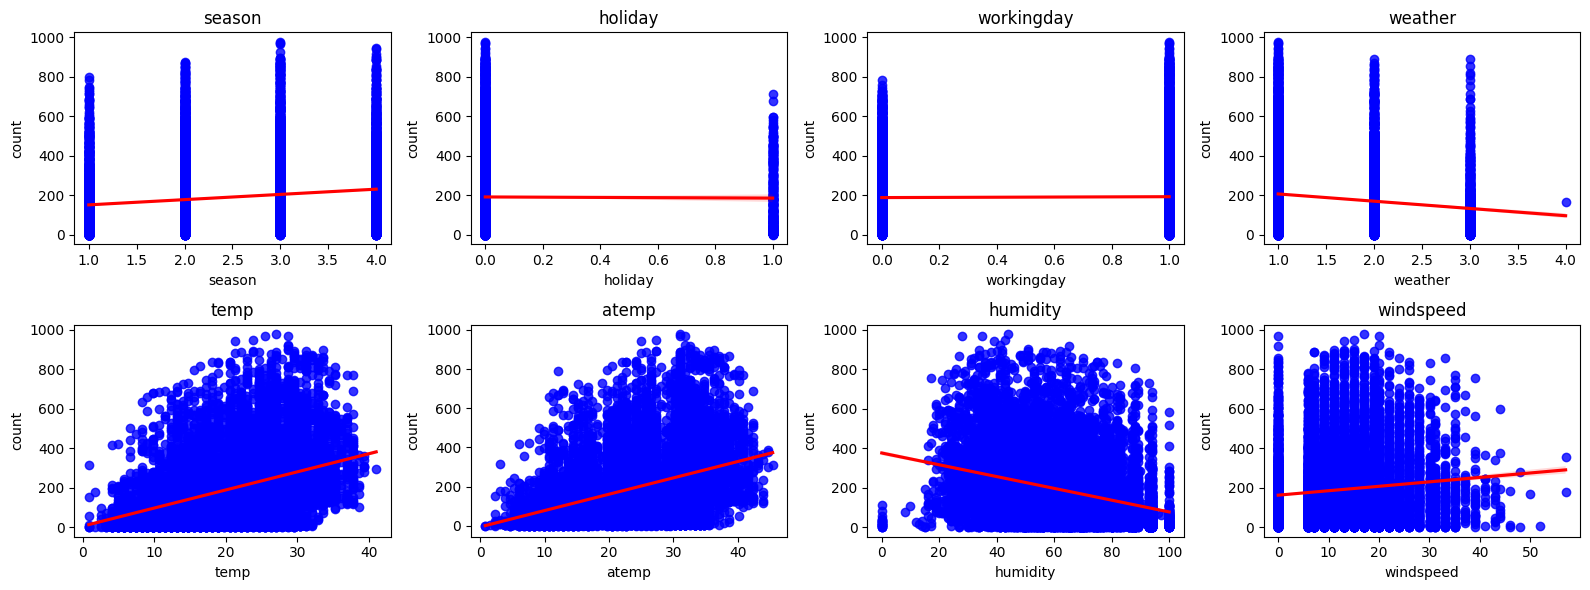

In [45]:
cols = ['season','holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity','windspeed']
fig, axs = plt.subplots(2,4,figsize=(16,6))
[sns.regplot(y = "count",x=i, data=df_bike,scatter_kws={"color": "blue"}, 
             line_kws={"color": "red"},ax=axs.flatten()[j]) for j,i in enumerate(cols[0:])]
[axs.flatten()[j].set_title(i) for j,i in enumerate(cols[0:])]
fig.tight_layout()
plt.plot()

**Lets use plot the heatmap and check the correlation between Target and Features**

In [46]:
corr = df_bike.corr(method='pearson')
corr

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.163439
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,-0.005393
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,0.011594
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.128655
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.394454
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.389784
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.317371
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.101369
count,0.163439,-0.005393,0.011594,-0.128655,0.394454,0.389784,-0.317371,0.101369,1.000000


<Axes: >

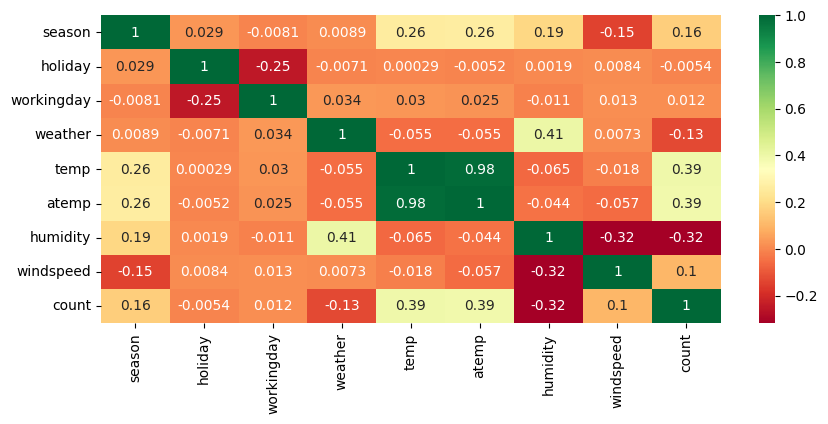

In [47]:
# Lets plot the heatmap between target and features
import matplotlib.pyplot as plt
corr = df_bike.corr(method='pearson')
import seaborn as sns
plt.figure(figsize=(10,4))
sns.heatmap(corr,cmap = "RdYlGn",annot=True)

In [48]:
df_bike.corrwith(df_bike["count"]) #Compute pairwise correlation.# compute correlation with target

season        0.163439
holiday      -0.005393
workingday    0.011594
weather      -0.128655
temp          0.394454
atemp         0.389784
humidity     -0.317371
windspeed     0.101369
count         1.000000
dtype: float64

**Display highly Correlated Features with target setting the threshold value**

In [49]:
# Display the correlated features
def correlation(dataset, threshold):
    col_corr = [] # those cols which have coeff greater than threshold value
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.append(colname)
    return col_corr                

In [50]:
corr_matrix = df_bike.iloc[:,0:].corr()

In [51]:
len(corr_matrix.columns)

9

In [52]:
range(len(corr_matrix.columns))

range(0, 9)

In [53]:
abs(corr_matrix.iloc[0, 1])

0.029367609714913947

In [54]:
corr_matrix.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'count'],
      dtype='object')

In [55]:
corr_matrix.columns[0]

'season'

In [56]:
# Display the correlated features 
# Lets Take the threshold = 70%
threshold = 0.7
correlation(df_bike.iloc[:,0:],threshold)

['atemp']

In [57]:
df_bike.corrwith(df_bike["atemp"])

season        0.264744
holiday      -0.005215
workingday    0.024660
weather      -0.055376
temp          0.984948
atemp         1.000000
humidity     -0.043536
windspeed    -0.057473
count         0.389784
dtype: float64

- Low correlation means there's no linear relationship; it doesn't mean there's no information in the feature that predicts the target so in real life problem we don't delete those features which are not correlated with target.
- It might be a good idea to remove one of the highly correlated between themselves non-target features, because they might be redundant. 
- In case of ordinals or binary features,as you can see columns('season','holiday', 'workingday', 'weather') correlation with Target won't tell you a lot. So I guess, the best way to test if a feature is important in case it's not correlated with target is to directly compare performance of a model with and without the feature. But still different features might have different importance for different algorithms.
- If a feature is strongly correlated with your label, this means a linear function (or model) should be able to predict well the latter. Even if it is not correlated, it doesn't tell you that a non-linear model wouldn't perform well by using this feature.

**Check the Correlation between the Independent Features**

In [58]:
df_features = df_bike.drop(labels=["count"],axis=1)

In [59]:
df_features.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed'],
      dtype='object')

<Axes: >

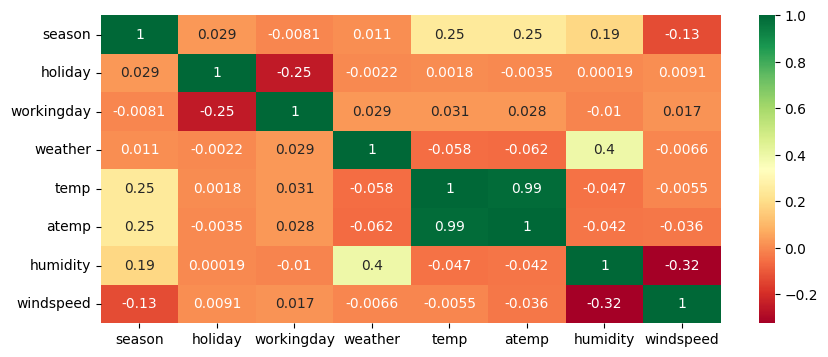

In [60]:
import matplotlib.pyplot as plt
corr_feat = df_features.corr(method='spearman')
import seaborn as sns
plt.figure(figsize=(10,4))
sns.heatmap(corr_feat,cmap = "RdYlGn",annot=True)

In [61]:
# How to calculate correlation between all features and remove highly correlated ones
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname] # deleting the column from the dataset
    print("Highly correlated features")
    print(colname)
    print(dataset) 

In [62]:
df_bike_fc = correlation(df_features,0.8)
df_bike_fc

Highly correlated features
atemp
       season  holiday  workingday  weather   temp  humidity  windspeed
0           1        0           0        1   9.84        81     0.0000
1           1        0           0        1   9.02        80     0.0000
2           1        0           0        1   9.02        80     0.0000
3           1        0           0        1   9.84        75     0.0000
4           1        0           0        1   9.84        75     0.0000
...       ...      ...         ...      ...    ...       ...        ...
10881       4        0           1        1  15.58        50    26.0027
10882       4        0           1        1  14.76        57    15.0013
10883       4        0           1        1  13.94        61    15.0013
10884       4        0           1        1  13.94        61     6.0032
10885       4        0           1        1  13.12        66     8.9981

[10886 rows x 7 columns]
